In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import analytic

In [15]:
import thinkstats2
import thinkplot

In [6]:
df = analytic.ReadBabyBoom()

In [14]:
diffs = df.minutes.diff()

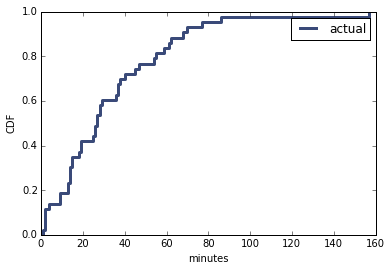

In [17]:
cdf = thinkstats2.Cdf(diffs, label="actual")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel="minutes", ylabel="CDF")

C:\Users\Kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


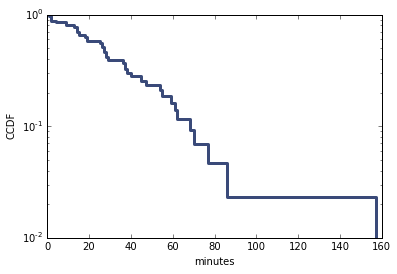

In [20]:
cdf = thinkstats2.Cdf(diffs)
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel="minutes", ylabel="CCDF", yscale="log")

In [41]:
import scipy.stats as stats

In [42]:
stats.norm.cdf(0)

0.5

In [43]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

In [44]:
EvalNormalCdf(0,7.28,1.24)

2.1662928758398585e-09

In [47]:
stats.norm.pdf(0.5)

0.35206532676429952

In [56]:
random_sample = np.random.normal(5,6,100)
std_normal_sample = np.random.normal(0,1,100)

In [57]:
random_sample.sort()
std_normal_sample.sort()

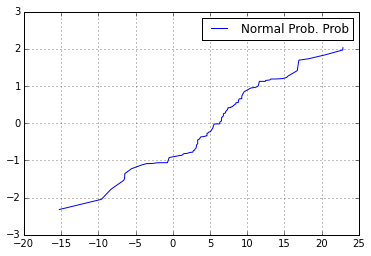

In [60]:
plt.plot(random_sample, std_normal_sample, label="Normal Prob. Prob")
plt.grid()
plt.legend()

In [65]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    xs = [-4,4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs,fys,color='gray', label='model')
    
    xs,ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs,ys,label='birth weights')

In [70]:
#MakeNormalPlot(df.weight_g)
#df
import nsfg
resp = nsfg.ReadFemPreg()

In [79]:
lives = resp[resp.outcome==1]
full_term = resp[resp.prglngth >= 36]

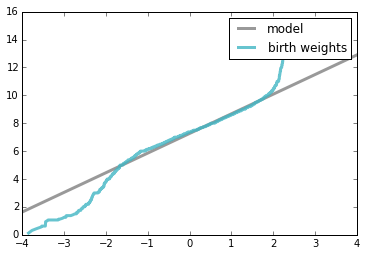

In [80]:
#thinkplot.PrePlot(2)
MakeNormalPlot(lives.totalwgt_lb)
#MakeNormalPlot(full_term.totalwgt_lb)
thinkplot.Show()

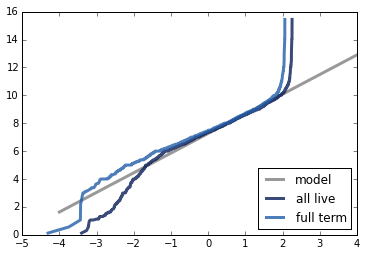

In [83]:
mean = lives.totalwgt_lb.mean()
std = lives.totalwgt_lb.std()
xs = [-4,4]
thinkplot.PrePlot(3)
fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
thinkplot.Plot(fxs,fys,color='gray', label='model')

xs,ys = thinkstats2.NormalProbability(lives.totalwgt_lb)
thinkplot.Plot(xs,ys,label='all live')

xs2,ys2 = thinkstats2.NormalProbability(full_term.totalwgt_lb)
thinkplot.Plot(xs2,ys2,label='full term')
thinkplot.Show(loc=4)

In [89]:
import math

In [90]:
log_weight = [math.log(x) for x in resp.totalwgt_lb]

{'xscale': 'linear', 'yscale': 'linear'}

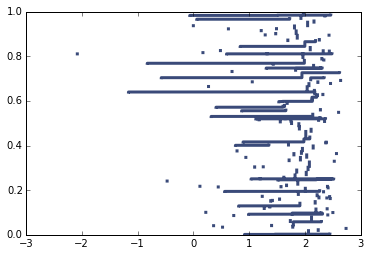

In [91]:
log_cdf = thinkstats2.Cdf(log_weight)
thinkplot.Cdf(log_cdf)